# Fake News Project

### Problem Statement:

Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

##### What is a Fake News?

Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.

For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.


##### Natural Language Processing

Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.

In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.


#### Importing necessary Libraries

In [4]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')



In [5]:
#Importing the Dataset
df_fake = pd.read_csv(r"C:\Users\Arpan Pattanayak\Downloads\Fake-News-Project\Fake News Project\Fake.csv")
df_true = pd.read_csv(r"C:\Users\Arpan Pattanayak\Downloads\Fake-News-Project\Fake News Project\True.csv")

In [11]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [12]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Fake dataset has 23481 rows and 4 columns. True news dataset has 21417 rows and 4 columns.

### Exploratory Data Analysis (EDA)

In [13]:
# To get overview of the dataset
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


All columns in both dataset are of Object data types.

In [17]:
# Checking for null values
df_fake.isnull().sum()



title      0
text       0
subject    0
date       0
dtype: int64

In [18]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

There is no null values in both dataset

In [19]:
# Statistical summary of dataset
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [20]:
# Statistical summary of dataset
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


##### Let's create a column label in both dataset

In [21]:
df_fake['label']= 0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [23]:
df_true['label']= 1
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


##### Let's combine both dataset for pre-processing

In [26]:
news= pd.concat([df_fake, df_true], ignore_index=True)

In [27]:
news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [28]:
# Dropping the irrelevent columns 
news.drop(['title', 'date', 'subject'],axis=1,inplace=True)
news

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

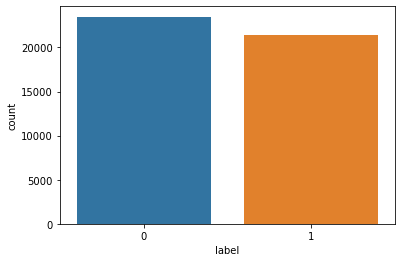

In [29]:
# Plotting count plot 
sns.countplot(data=news, x='label', order=news['label'].value_counts().index)

#### Data Pre-Processing

In [30]:
#Creating a function to process the texts
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [31]:
news['text']=news['text'].apply(wordopt)
news.head()

,text,label
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0


#### Wordcloud

In [32]:
wc = WordCloud(width = 500, height = 400, min_font_size= 10, background_color= 'black')

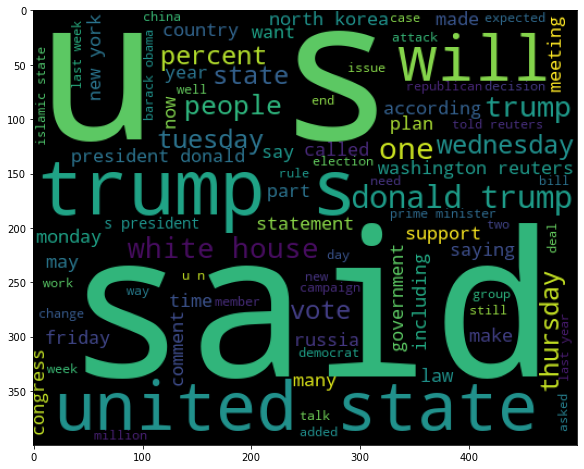

In [33]:
#Generating Word Cloud for True News
true_wordcloud = wc.generate(news[news['label']==1]['text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(true_wordcloud)
plt.show()

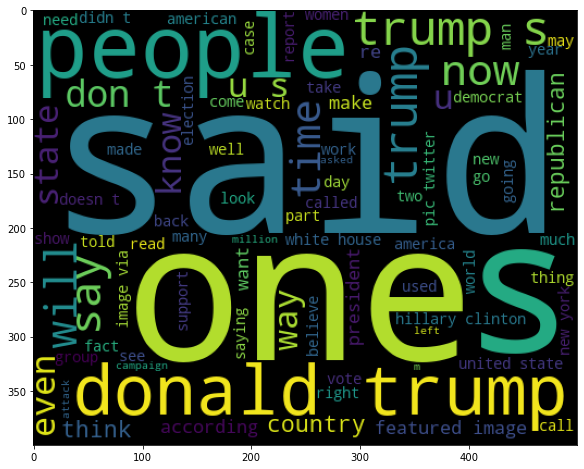

In [34]:
#Generating Word Cloud for Fake News
fake_wordcloud = wc.generate(news[news['label']==0]['text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(fake_wordcloud)
plt.show()

In [35]:
#Top 30 most frequently occuring words in True news
true_corpus = []
for msg in news[news['label']==1]['text'].tolist():
    for word in msg.split():
        true_corpus.append(word)

<function matplotlib.pyplot.show(close=None, block=None)>

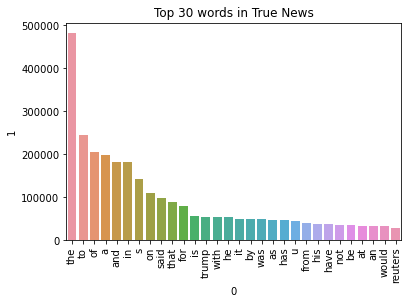

In [36]:
sns.barplot(pd.DataFrame(Counter(true_corpus).most_common(30))[0] , pd.DataFrame(Counter(true_corpus).most_common(30))[1])
plt.title("Top 30 words in True News")
plt.xticks(rotation = "vertical")
plt.show

In [37]:
#Top 30 most frequently occuring words in Fake news

fake_corpus = []
for msg in news[news['label']==0]['text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

<function matplotlib.pyplot.show(close=None, block=None)>

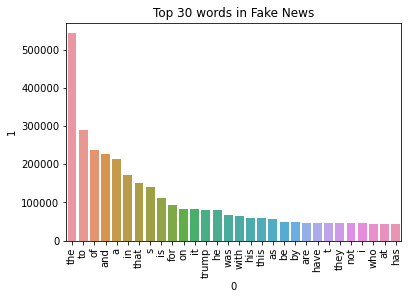

In [38]:
sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0] , pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.title("Top 30 words in Fake News")
plt.xticks(rotation = "vertical")
plt.show

#### Separating dependent and independent variables

In [39]:
x = news["text"]
y = news["label"]

In [40]:
#Convert text to vectors using TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
message_mat = vectorizer.fit_transform(news['text'])
message_mat

<44898x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 7128681 stored elements in Compressed Sparse Row format>

In [41]:
x= message_mat
print(x.shape)
print(y.shape)

(44898, 3000)
(44898,)


## Modeling

#### Finding the Best Random State and Accuracy

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [43]:
maxAccu = 0
maxRs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred_LR = LR.predict(x_test)
    acc = accuracy_score(y_test,pred_LR)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.98913140311804 on Random_state 32


##### Now splitting the data for Training and Testing purpose.

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=maxRs)

In [46]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

In [47]:
# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    # Prediction
    pred = model.predict(x_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    
    # Mean Absolute Error(MAE)
    print('Mean Absolute Error(MAE)',mean_absolute_error(y_test,pred))

    # Mean Squared Error(MSE)
    print('Mean Squared Error',mean_squared_error(y_test,pred))

    # Root Mean Squared Error (RMSE)
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
    
    # Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    
    # Confusion matrix and 
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    
    print("-"*120)
    print("\n")

In [48]:
for model in [lr,dtc,gbc,rfc,svc,bnb,mnb,sgd,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 98.913140311804
Mean Absolute Error(MAE) 0.01086859688195991
Mean Squared Error 0.01086859688195991
Root Mean Squared Error 0.1042525629515165
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5364

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

CONFUSION MATRIX: 
 [[5794   67]
 [  55 5309]]

------------------------------------------------------------------------------------------------------------------------


******************************DecisionTreeClassifier******************************
ACCURACY SCORE PERCENTAGE: 99.55456570155901
Mean Absolute Error(MAE) 0.004454342984409799
Mean Squared Error 0.004454342984409799
Root Mean Squa

#### Cross validation score for best score models

In [49]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,x,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,dtc,gbc,rfc,svc,bnb,mnb,sgd,lgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score: 96.95754822041071


******************************DecisionTreeClassifier******************************
Cross validation score: 99.1135462604125


******************************GradientBoostingClassifier******************************
Cross validation score: 99.35854603768543


******************************RandomForestClassifier******************************
Cross validation score: 99.42536415875985


******************************LinearSVC******************************
Cross validation score: 98.48768319301527


******************************BernoulliNB******************************
Cross validation score: 90.40714508441356


******************************MultinomialNB******************************
Cross validation score: 88.3669651209408


******************************SGDClassifier******************************
Cross validation score: 97.80391108735355


****************************

From the difference between Accuracy score and Cross Validation score, it can be seen that the Linear SVC has least difference and low evaluation metrics compared to other models.Let's try to increase our model score by tuning the best model using different types of hyper parameters.

## Hyper Parameter Tuning

##### Linear SVC with GridSearchCV

In [50]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [51]:
# Selecting the best parameters found by GridSearchCV
LSVC.best_params_ 

{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [52]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 99.49220489977728

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5861
           1       1.00      0.99      0.99      5364

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


CONFUSION MATRIX: 
 [[5839   22]
 [  35 5329]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

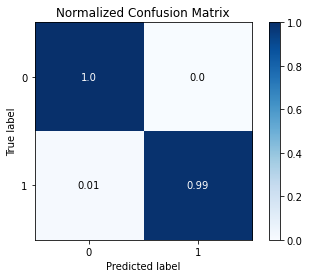

In [53]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

## Saving the Final model

In [54]:
# Saving the model using joblib library 
import joblib
joblib.dump(best_model,"Fake_News_Prediction.pkl")

['Fake_News_Prediction.pkl']

### Loading the saved model and predicting

In [55]:
# Loading the saved model
Model=joblib.load("Fake_News_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
Fake_News_Detection = pd.DataFrame()
Fake_News_Detection['Predicted Fake News'] = prediction
Fake_News_Detection['Actual Fake News'] = y
Fake_News_Detection

,Predicted Fake News,Actual Fake News
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
11220,0,0
11221,1,0
11222,0,0
11223,1,0
